<a href="https://colab.research.google.com/github/Suryageeks/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
sns.set_style('darkgrid')

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/creditcard.csv"
df=pd.read_csv(path)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe(include='all')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Time'].median()

84692.0

In [ ]:
df['Amount'].median()

22.0

In [ ]:
df.shape

(284807, 31)

In [ ]:
Non_Fraud=df['Class'].value_counts()
Fraud=df['Class'].value_counts()

[[Text(0, 0, 'Fraud'), Text(0, 0, 'Non-Fraud')]]

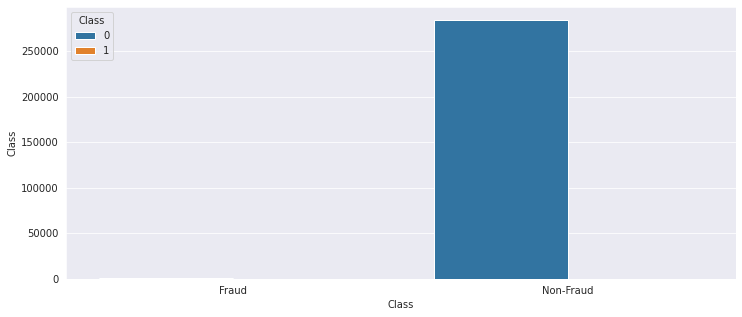

In [ ]:
plt.figure(figsize=(12,5))
g=sns.barplot(x=Non_Fraud,y=Fraud,data=df,hue=df.Class)
g.set(xticklabels=['Fraud','Non-Fraud'])

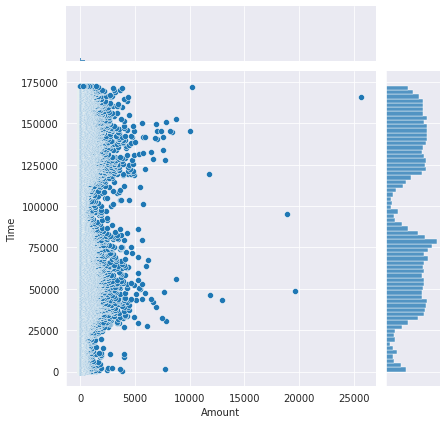

In [ ]:
sns.jointplot(x='Amount',y='Time',data=df)

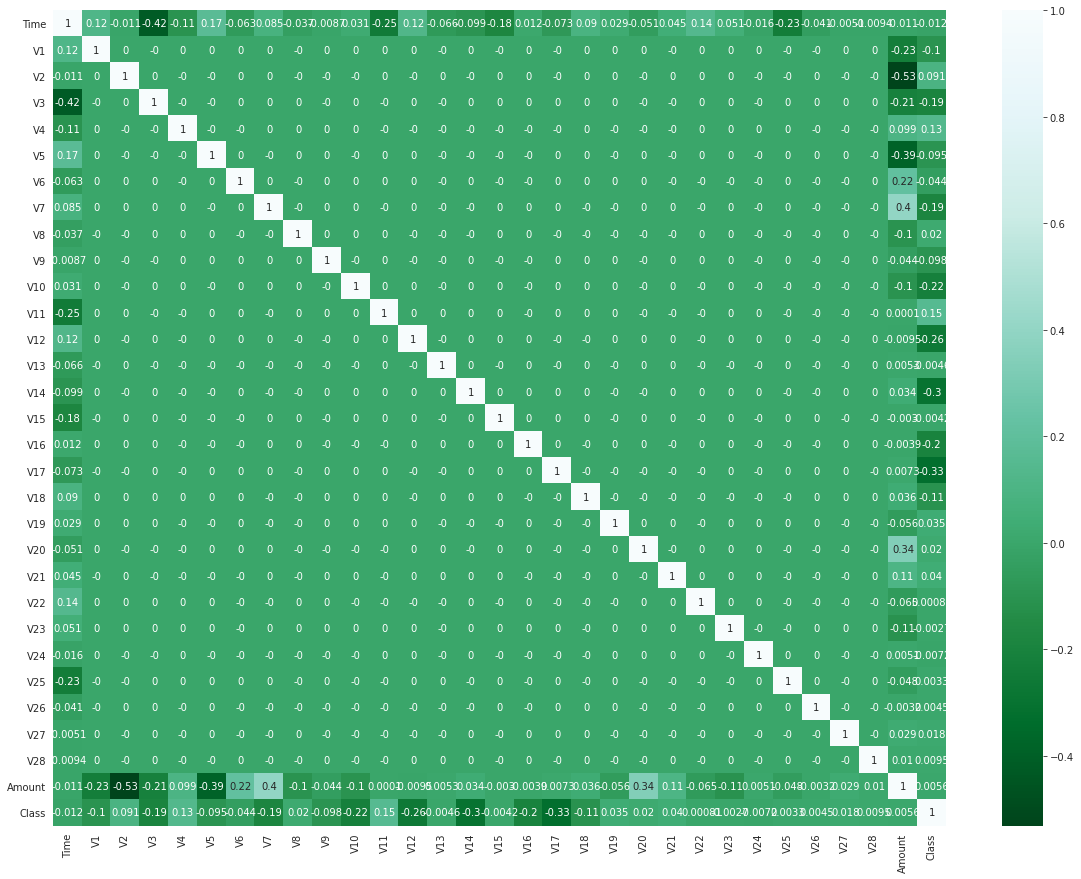

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr().round(8),annot=True,cmap='BuGn_r')

In [ ]:
df['Fraud']=df['Class'].value_counts().values[1]
df['Non_Fraud']=df['Class'].value_counts().values[0]
fraud_percent=df['Fraud']/len(df['Class'])*100
Non_Fraud_percent=df['Non_Fraud']/len(df['Class'])*100
print('Fraud percentage %.3f' % fraud_percent[0],'%')
print('Non_Fraud percentage %.3f' % Non_Fraud_percent[0],'%')

Fraud percentage 0.173 %
Non_Fraud percentage 99.827 %


In [ ]:
Fraud1=df.loc[df['Class']==1]
Non_Fraud1=df.loc[df['Class']==0]

In [ ]:
Fraud1.drop(columns=['Fraud','Non_Fraud'],axis=1,inplace=True)
Non_Fraud1.drop(columns=['Fraud','Non_Fraud'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Fraud1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
Fraud1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [ ]:
Non_Fraud1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
Fraud1['Time'].median()

75568.5

In [ ]:
Fraud1['Amount'].median()

9.25

In [ ]:
Fraud1['Amount'].max()

2125.87

In [ ]:
Fraud1['Amount'].min()

0.0

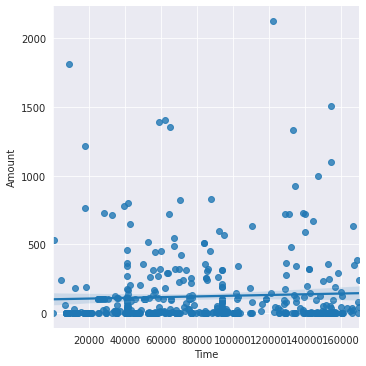

In [ ]:
sns.lmplot(x='Time',y='Amount',data=Fraud1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


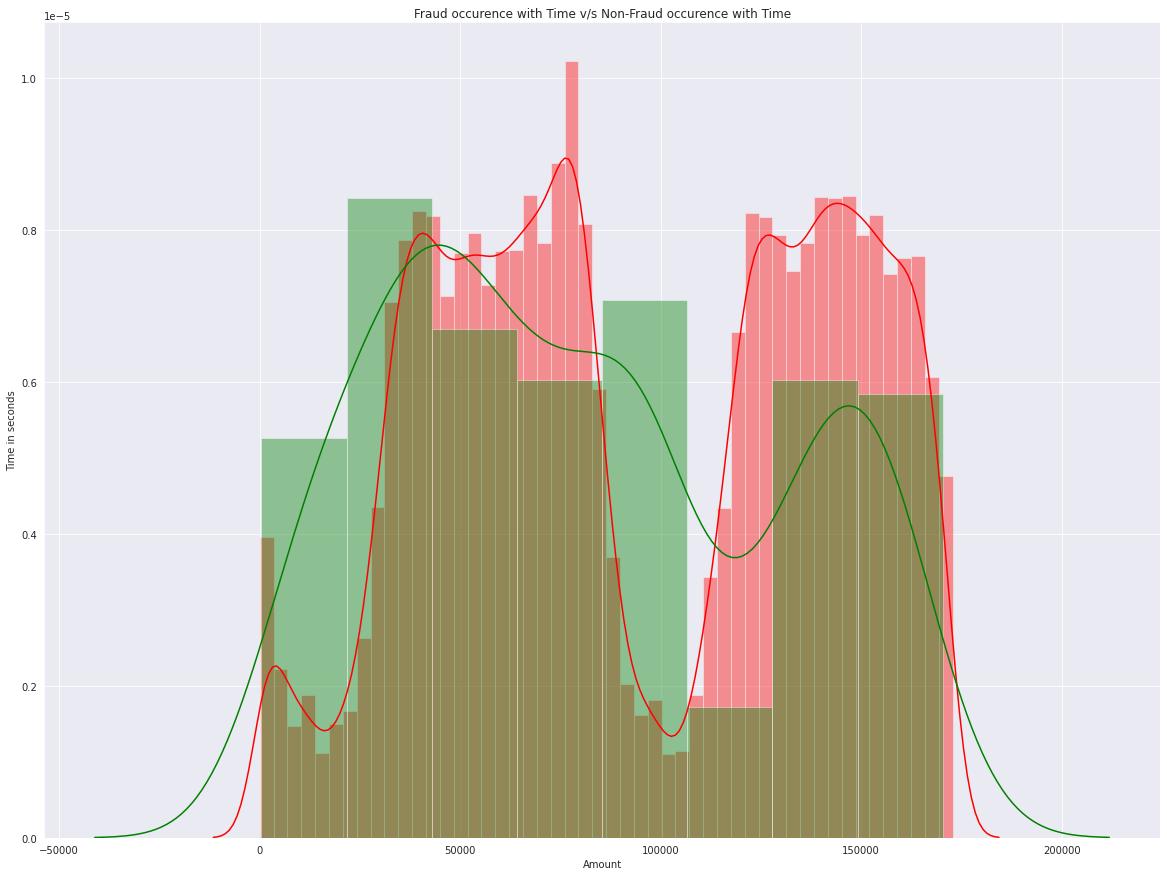

In [ ]:
plt.figure(figsize=(20,15))
sns.distplot(df[df['Class']==0]['Time'],color='r')
sns.distplot(df[df['Class']==1]['Time'],color='g')
plt.title("Fraud occurence with Time v/s Non-Fraud occurence with Time")
plt.xlabel('Amount')
plt.ylabel('Time in seconds')
plt.show()

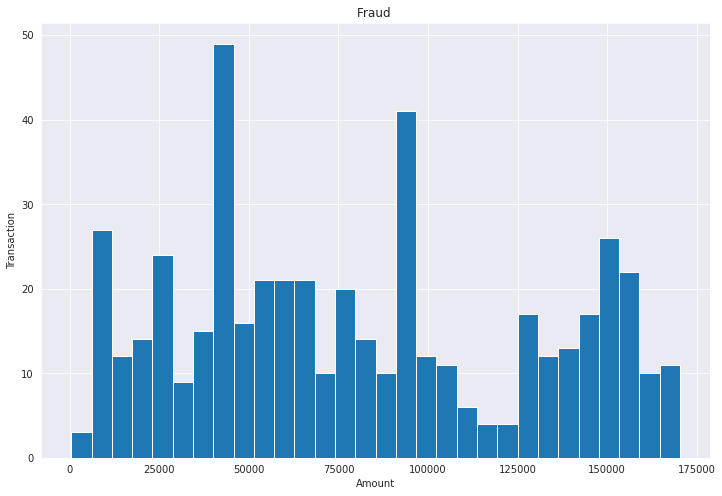

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df.Time[df.Class==1],bins=30)
plt.title("Fraud ")
plt.xlabel('Amount')
plt.ylabel('Transaction')
plt.show()

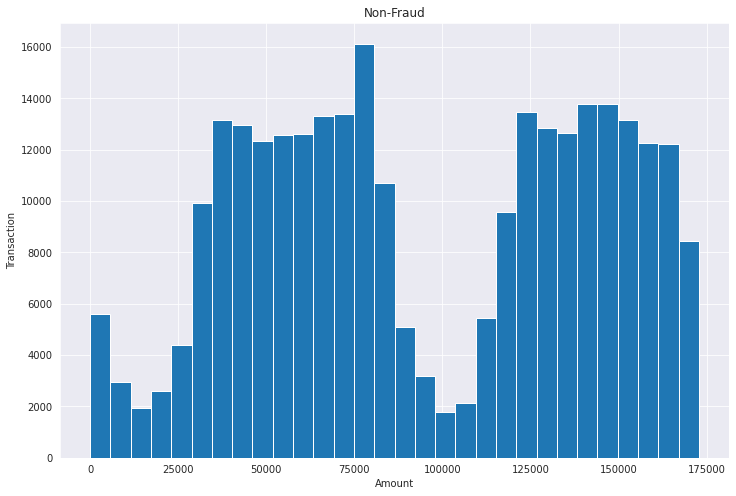

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df.Time[df.Class==0],bins=30)
plt.title("Non-Fraud")
plt.xlabel('Amount')
plt.ylabel('Transaction')
plt.show()

In [ ]:
df['Amount'].skew

<bound method Series.skew of 0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64>

In [ ]:
Fraud1['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
Non_Fraud1['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**TRAIN TEST SPLIT**

In [ ]:
x=df.iloc[:,:-1]
y=df["Class"]

In [ ]:
x.drop(columns=['Class','Fraud'],axis=1,inplace=True)

In [ ]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()
scale_x_train=scale.fit_transform(x_train)
scale_x_test=scale.fit_transform(x_test)

In [ ]:
scale_x_train.shape,scale_x_test.shape,y_train.shape,y_test.shape

**MODEL BUILDING**

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic=LogisticRegression()

In [ ]:
logistic.fit(scale_x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic.coef_

array([[-0.16431101,  0.20287457,  0.01659982,  0.01107017,  0.95810352,
         0.13439048, -0.16837798, -0.16738085, -0.19621029, -0.28887466,
        -0.82555539,  0.01213884,  0.05674266, -0.27678158, -0.5204262 ,
        -0.12072191, -0.08197349, -0.01968051, -0.07534042,  0.06194849,
        -0.34470767,  0.26941821,  0.42270493, -0.04591639,  0.04293952,
        -0.04778779,  0.09307326, -0.30993661, -0.09255473,  0.2546066 ]])

In [ ]:
logistic.intercept_

array([-8.56728242])

In [ ]:
logistic.predict(scale_x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred=(logistic.predict_proba(scale_x_test)[:,1]>=0.2)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,precision_recall_curve

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.84      0.77      0.80       101

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print(accuracy_score(y_test,y_pred)*100)

99.93328885923948


In [ ]:
print("precision score ",precision_score(y_test,y_pred))
print("Recall Score ",recall_score(y_test,y_pred))
print("Roc Auc Score ",roc_auc_score(y_test,y_pred))

precision score  0.8387096774193549
Recall Score  0.7722772277227723
Roc Auc Score  0.886006713261678


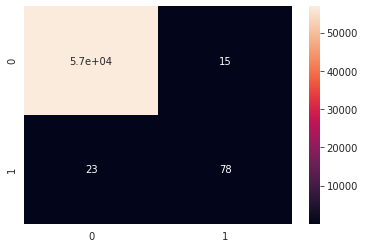

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)


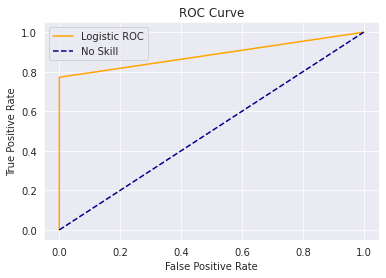

In [ ]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr, tpr, color='orange', label='Logistic ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**LINEAR DISCRIMINANT ANALYSIS**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [ ]:
lda=LinearDiscriminantAnalysis()
lda.fit(scale_x_train,y_train)
print('Intercept %.3f ' %lda.intercept_)
print('Coefficient ' ,lda.coef_)

Intercept -321.477 
Coefficient  [[ -0.29790085  -4.54439201   5.67791974  -9.38030638   6.51223158
   -3.82417068  -2.67391081 -10.19312411   1.19008548  -4.79752809
  -10.6908959    7.80275465 -13.12719007  -0.25021381 -15.40496654
   -0.28231596  -9.88733759 -16.58127693  -5.70023715   1.86857994
    0.23825178   1.93884833   0.15834513   0.17639038  -0.40835602
    0.19733196   0.27375801   0.85093541   0.50885799   2.13518679]]


In [ ]:
lda.predict(scale_x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_lda=(lda.predict_proba(scale_x_test)[:,1]>=0.5)

In [ ]:
print(classification_report(y_test,y_pred_lda))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.76      0.81       101

    accuracy                           1.00     56962
   macro avg       0.94      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print("precision score ",precision_score(y_test,y_pred_lda))
print("Recall Score ",recall_score(y_test,y_pred_lda))
print("Roc Auc Score ",roc_auc_score(y_test,y_pred_lda))

precision score  0.875
Recall Score  0.7623762376237624
Roc Auc Score  0.8810913917054286


In [ ]:
accuracy_score(y_test,y_pred_lda)

0.999385555282469

Text(33.0, 0.5, 'Actual')

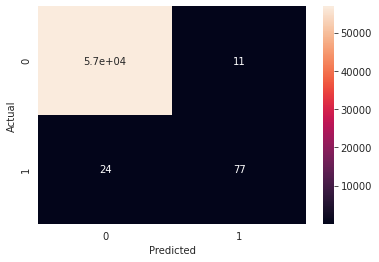

In [ ]:
cm=confusion_matrix(y_test,y_pred_lda)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

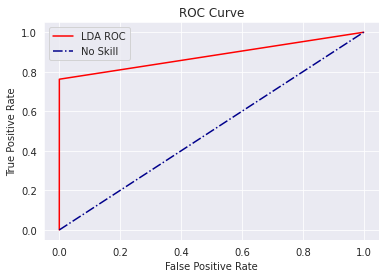

In [ ]:
fpr1,tpr1,threshold1=roc_curve(y_test,y_pred_lda)
plt.plot(fpr1, tpr1, color='red', label='LDA ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='-.',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**K NEAREST NEIGHBORS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(scale_x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn=(knn.predict_proba(scale_x_test)[:,1]>=0.3)

Text(33.0, 0.5, 'Actual')

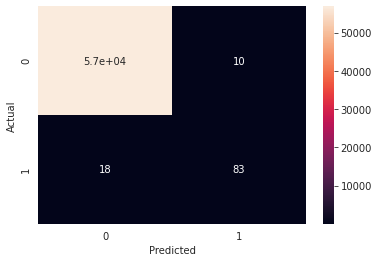

In [ ]:
cm=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
accuracy_score(y_test,y_pred_knn)

0.9995084442259752

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.82      0.86       101

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print("precision score ",precision_score(y_test,y_pred_knn))
print("Recall Score ",recall_score(y_test,y_pred_knn))
print('Roc Auc Score ',roc_auc_score(y_test,y_pred_knn))

precision score  0.8924731182795699
Recall Score  0.8217821782178217
Roc Auc Score  0.9108031553757722


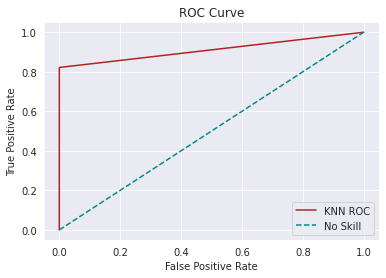

In [ ]:
fpr2,tpr2,th2=roc_curve(y_test,y_pred_knn)
plt.plot(fpr2, tpr2, color='firebrick', label='KNN ROC')
plt.plot([0, 1], [0, 1], color='darkcyan', linestyle='dashed',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rfc=RandomForestClassifier(n_jobs=-1,criterion='gini')
Rfc.fit(scale_x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rfc=(Rfc.predict_proba(scale_x_test)[:,1]>=0.2)

In [ ]:
print("\t\t\t Classfication Report")
print(classification_report(y_test,y_pred_rfc))

			 Classfication Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.82      0.86      0.84       101

    accuracy                           1.00     56962
   macro avg       0.91      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print('Precision Score ',precision_score(y_test,y_pred_rfc))
print('Recall Score ',recall_score(y_test,y_pred_rfc))
print('Roc Auc Score ',roc_auc_score(y_test,y_pred_rfc))

Precision Score  0.8207547169811321
Recall Score  0.8613861386138614
Roc Auc Score  0.9305259952139671


Text(33.0, 0.5, 'Actual')

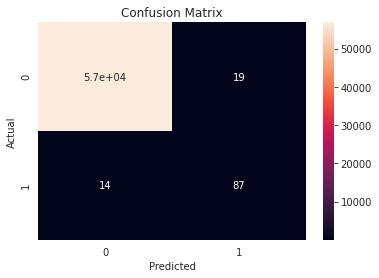

In [ ]:
cm=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

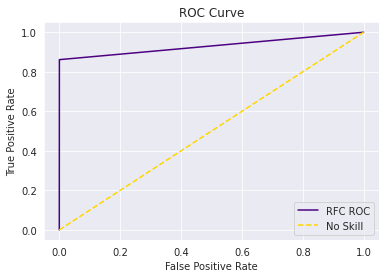

In [ ]:
fpr3,tpr3,th3=roc_curve(y_test,y_pred_rfc)
plt.plot(fpr3, tpr3, color='indigo', label='RFC ROC')
plt.plot([0, 1], [0, 1], color='gold', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Thus our Random Forest Classifier giving us a better Roc Auc Score, But to Further increase the score we will be using Adaboost with it so to further enhance the model

**ADABOOST WITH RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier(Rfc,learning_rate=0.05)

In [ ]:
ada.fit(scale_x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [ ]:
y_pred_ada=(ada.predict_proba(scale_x_test)[:,1]>=0.1)

In [ ]:
print('Precision Score ',precision_score(y_test,y_pred_ada))
print('Recall Score ',recall_score(y_test,y_pred_ada))
print('Roc Auc Score ',roc_auc_score(y_test,y_pred_ada))

Precision Score  0.7272727272727273
Recall Score  0.8712871287128713
Roc Auc Score  0.9353533830370779


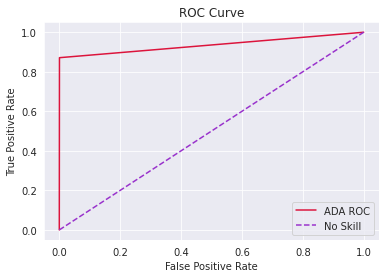

In [ ]:
fpr4,tpr4,th4=roc_curve(y_test,y_pred_ada)
plt.plot(fpr4, tpr4, color='crimson', label='ADA ROC')
plt.plot([0, 1], [0, 1], color='darkorchid', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
print("\t\t\t Classfication Report")
print(classification_report(y_test,y_pred_ada))

			 Classfication Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.73      0.87      0.79       101

    accuracy                           1.00     56962
   macro avg       0.86      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962



Text(33.0, 0.5, 'Actual')

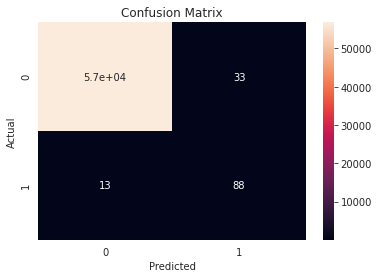

In [ ]:
cm=confusion_matrix(y_test,y_pred_ada)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

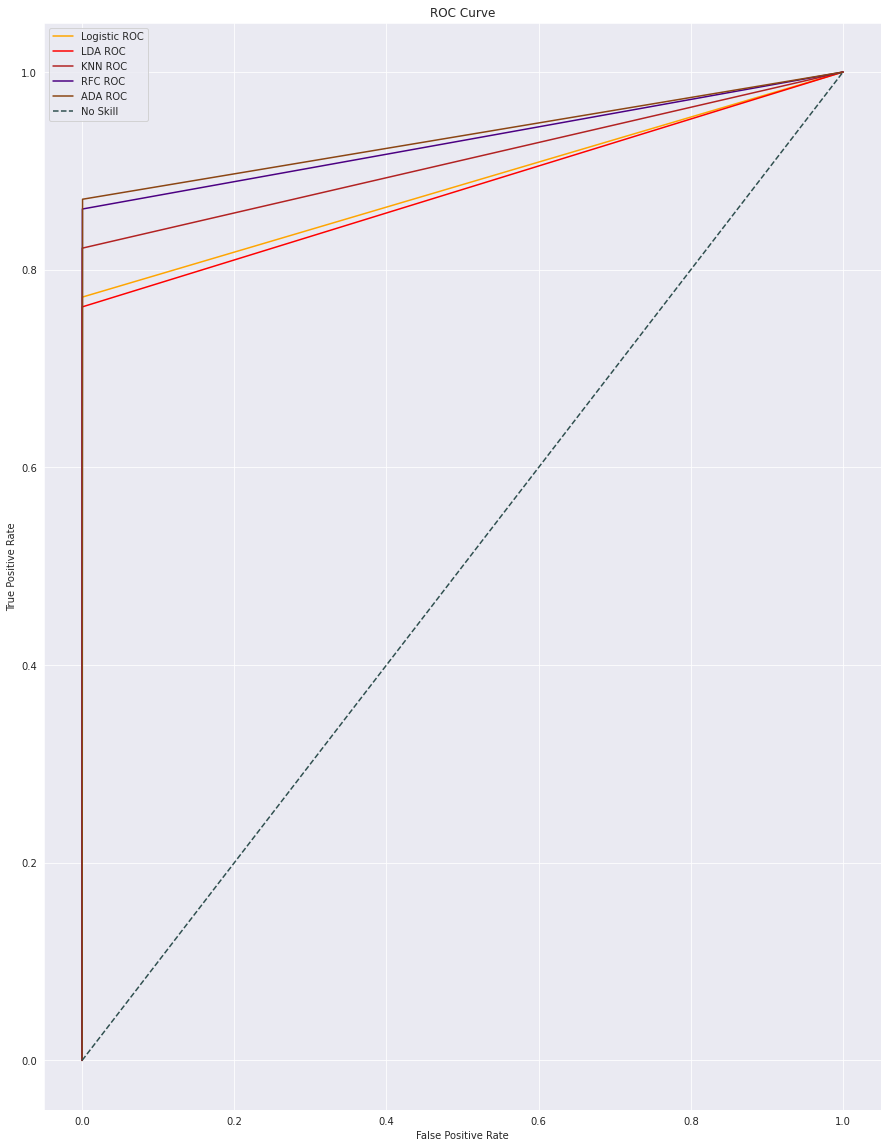

In [ ]:
#Plot to show all the Roc Curve with Different Models
plt.figure(figsize=(15,20))
plt.plot(fpr, tpr, color='orange', label='Logistic ROC')
plt.plot(fpr1, tpr1, color='red', label='LDA ROC')
plt.plot(fpr2, tpr2, color='firebrick', label='KNN ROC')
plt.plot(fpr3, tpr3, color='indigo', label='RFC ROC')
plt.plot(fpr4, tpr4, color='saddlebrown', label='ADA ROC')
plt.plot([0, 1], [0, 1], color='darkslategrey', linestyle='--',label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()